
# ETL

There are two datasets: train and test.  Both have been preprocessed above and loaded into PostgreSQL.  First, the database connection was created, then the tables created and then loaded with the fully pre-processed data.

## Data Model

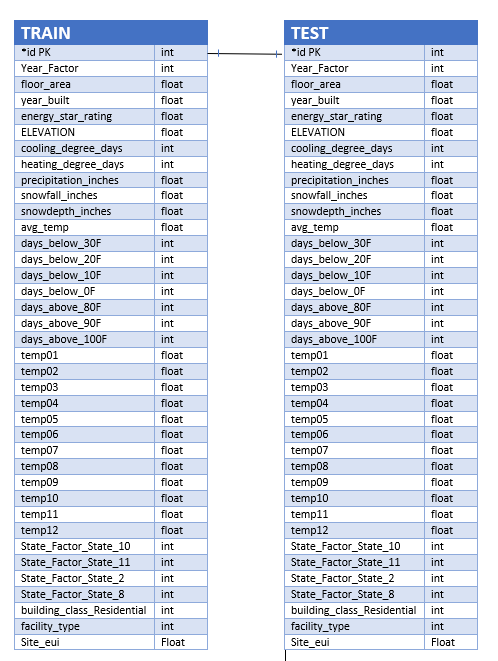

### postgres connection information

In [95]:
import csv
import os
import requests

#database connection
import psycopg2
import psycopg2.extras #saves output into dict


# postgres password info
from postgres_keys import postgres_key


#store the assess info
host = 'localhost'
database = 'wids'
user = 'postgres'
password = postgres_key

### Create and load train dataset

In [98]:
#setting these to ensure database/cursor connection will close at end
conn = None
cur = None

try:
    # connecting to the database
    conn = psycopg2.connect(host=host, database=database, user=user, password=postgres_key)
    #open cursor
    cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor) #returns output as dict
     
#Train Data -
    #to avoid errors due to overwrite in script execution
    cur.execute('DROP TABLE IF EXISTS train')
    
    #create table script
    create_script = ''' CREATE TABLE IF NOT EXISTS train (
                        Year_Factor int,
                        floor_area float,
                        year_built float,
                        energy_star_rating float,
                        ELEVATION float,
                        cooling_degree_days int,
                        heating_degree_days int,
                        precipitation_inches float,
                        snowfall_inches float,
                        snowdepth_inches float,
                        avg_temp float,
                        days_below_30F int,
                        days_below_20F int,
                        days_below_10F int,
                        days_below_0F int,
                        days_above_80F int,
                        days_above_90F int,
                        days_above_100F int,
                        temp01 float,
                        temp02 float,
                        temp03 float,
                        temp04 float,
                        temp05 float,
                        temp06 float,
                        temp07 float,
                        temp08 float,
                        temp09 float,
                        temp10 float,
                        temp11 float,
                        temp12 float,
                        State_Factor_State_10 int,
                        State_Factor_State_11 int,
                        State_Factor_State_2 int,
                        State_Factor_State_8 int,
                        building_class_Residential int,
                        facility_type_5plus_Unit_Building int,
                        facility_type_Commercial_Other int,
                        facility_type_Commercial_Unknown int,
                        facility_type_Data_Center int,
                        facility_type_Education_College_or_university int,
                        facility_type_Education_Other_classroom int,
                        facility_type_Education_Preschool_or_daycare int,
                        facility_type_Education_Uncategorized int,
                        facility_type_Food_Sales int,
                        facility_type_Food_Service_Restaurant_or_cafeteria int,
                        facility_type_Food_Service_Uncategorized int,
                        facility_type_Grocery_store_or_food_market int,
                        facility_type_Health_Care_Inpatient int,
                        facility_type_Health_Care_Outpatient_Clinic int,
                        facility_type_Health_Care_Outpatient_Uncategorized int,
                        facility_type_Health_Care_Uncategorized int,
                        facility_type_Industrial int,
                        facility_type_Laboratory int,
                        facility_type_Lodging_Dormitory_or_fraternity_sorority int,
                        facility_type_Lodging_Hotel int,
                        facility_type_Lodging_Other int,
                        facility_type_Mixed_Use_Commercial_and_Residential int,
                        facility_type_Mixed_Use_Predominantly_Commercial int,
                        facility_type_Multifamily_Uncategorized int,
                        facility_type_Nursing_Home int,
                        facility_type_Office_Bank_or_other_financial int,
                        facility_type_Office_Medical_non_diagnostic int,
                        facility_type_Office_Mixed_use int,
                        facility_type_Office_Uncategorized int,
                        facility_type_Parking_Garage int,
                        facility_type_Public_Assembly_Drama_theater int,
                        facility_type_Public_Assembly_Entertainment_culture int,
                        facility_type_Public_Assembly_Library int,
                        facility_type_Public_Assembly_Movie_Theater int,
                        facility_type_Public_Assembly_Other int,
                        facility_type_Public_Assembly_Recreation int,
                        facility_type_Public_Assembly_Social_meeting int,
                        facility_type_Public_Assembly_Stadium int,
                        facility_type_Public_Assembly_Uncategorized int,
                        facility_type_Public_Safety_Courthouse int,
                        facility_type_Public_Safety_Fire_or_police_station int,
                        facility_type_Public_Safety_Penitentiary int,
                        facility_type_Religious_worship int,
                        facility_type_Retail_Enclosed_mall int,
                        facility_type_Retail_Strip_shopping_mall int,
                        facility_type_Retail_Uncategorized int,
                        facility_type_Retail_Vehicle_dealership_showroom int,
                        facility_type_Service_Drycleaning_or_Laundry int,
                        facility_type_Service_Uncategorized int,
                        facility_type_Service_Vehicle_service_repair_shop int,
                        facility_type_Warehouse_Distribution_or_Shipping_center int,
                        facility_type_Warehouse_Nonrefrigerated int,
                        facility_type_Warehouse_Refrigerated int,
                        facility_type_Warehouse_Selfstorage int,
                        facility_type_Warehouse_Uncategorized int,
                        site_eui float) '''


    #execute create table
    cur.execute(create_script)
      
    #First delete the existing contents of this table in case we want to run the code multiple times.
    cur.execute("DELETE FROM train")

    with open('train_preprocessed.csv', 'r') as i:
        next(i) #no header needed
        cur.copy_from(i, 'train', sep=',',null='')

    #commit change
    conn.commit()
        
    # closing the connection and cursor
    cur.close()
    conn.close()

except Exception as error:
    print(error)
    
finally:
    # closing the connection and cursor, if problems arise in try block
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

### Create and load test dataset

In [99]:
#setting these to ensure database/cursor connection will close at end
conn = None
cur = None

try:
    # connecting to the database
    conn = psycopg2.connect(host=host, database=database, user=user, password=postgres_key)
    #open cursor
    cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor) #returns output as dict
     
#Train Data -
    #to avoid errors due to overwrite in script execution
    cur.execute('DROP TABLE IF EXISTS test')
    
    #create table script
    create_script = ''' CREATE TABLE IF NOT EXISTS test (
                        Year_Factor int,
                        floor_area float,
                        year_built float,
                        energy_star_rating float,
                        ELEVATION float,
                        cooling_degree_days int,
                        heating_degree_days int,
                        precipitation_inches float,
                        snowfall_inches float,
                        snowdepth_inches float,
                        avg_temp float,
                        days_below_30F int,
                        days_below_20F int,
                        days_below_10F int,
                        days_below_0F int,
                        days_above_80F int,
                        days_above_90F int,
                        days_above_100F int,
                        temp01 float,
                        temp02 float,
                        temp03 float,
                        temp04 float,
                        temp05 float,
                        temp06 float,
                        temp07 float,
                        temp08 float,
                        temp09 float,
                        temp10 float,
                        temp11 float,
                        temp12 float,
                        State_Factor_State_10 int,
                        State_Factor_State_11 int,
                        State_Factor_State_2 int,
                        State_Factor_State_8 int,
                        building_class_Residential int,
                        facility_type_5plus_Unit_Building int,
                        facility_type_Commercial_Other int,
                        facility_type_Commercial_Unknown int,
                        facility_type_Data_Center int,
                        facility_type_Education_College_or_university int,
                        facility_type_Education_Other_classroom int,
                        facility_type_Education_Preschool_or_daycare int,
                        facility_type_Education_Uncategorized int,
                        facility_type_Food_Sales int,
                        facility_type_Food_Service_Restaurant_or_cafeteria int,
                        facility_type_Food_Service_Uncategorized int,
                        facility_type_Grocery_store_or_food_market int,
                        facility_type_Health_Care_Inpatient int,
                        facility_type_Health_Care_Outpatient_Clinic int,
                        facility_type_Health_Care_Outpatient_Uncategorized int,
                        facility_type_Health_Care_Uncategorized int,
                        facility_type_Industrial int,
                        facility_type_Laboratory int,
                        facility_type_Lodging_Dormitory_or_fraternity_sorority int,
                        facility_type_Lodging_Hotel int,
                        facility_type_Lodging_Other int,
                        facility_type_Mixed_Use_Commercial_and_Residential int,
                        facility_type_Mixed_Use_Predominantly_Commercial int,
                        facility_type_Multifamily_Uncategorized int,
                        facility_type_Nursing_Home int,
                        facility_type_Office_Bank_or_other_financial int,
                        facility_type_Office_Medical_non_diagnostic int,
                        facility_type_Office_Mixed_use int,
                        facility_type_Office_Uncategorized int,
                        facility_type_Parking_Garage int,
                        facility_type_Public_Assembly_Drama_theater int,
                        facility_type_Public_Assembly_Entertainment_culture int,
                        facility_type_Public_Assembly_Library int,
                        facility_type_Public_Assembly_Movie_Theater int,
                        facility_type_Public_Assembly_Other int,
                        facility_type_Public_Assembly_Recreation int,
                        facility_type_Public_Assembly_Social_meeting int,
                        facility_type_Public_Assembly_Stadium int,
                        facility_type_Public_Assembly_Uncategorized int,
                        facility_type_Public_Safety_Courthouse int,
                        facility_type_Public_Safety_Fire_or_police_station int,
                        facility_type_Public_Safety_Penitentiary int,
                        facility_type_Religious_worship int,
                        facility_type_Retail_Enclosed_mall int,
                        facility_type_Retail_Strip_shopping_mall int,
                        facility_type_Retail_Uncategorized int,
                        facility_type_Retail_Vehicle_dealership_showroom int,
                        facility_type_Service_Drycleaning_or_Laundry int,
                        facility_type_Service_Uncategorized int,
                        facility_type_Service_Vehicle_service_repair_shop int,
                        facility_type_Warehouse_Distribution_or_Shipping_center int,
                        facility_type_Warehouse_Nonrefrigerated int,
                        facility_type_Warehouse_Refrigerated int,
                        facility_type_Warehouse_Selfstorage int,
                        facility_type_Warehouse_Uncategorized int) '''


    #execute create table
    cur.execute(create_script)
      
    #First delete the existing contents of this table in case we want to run the code multiple times.
    cur.execute("DELETE FROM test")

    with open('test_preprocessed.csv', 'r') as i:
        next(i) #no header needed
        cur.copy_from(i, 'test', sep=',',null='')

    #commit change
    conn.commit()
        
    # closing the connection and cursor
    cur.close()
    conn.close()

except Exception as error:
    print(error)
    
finally:
    # closing the connection and cursor, if problems arise in try block
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

### Results of loading data into PostgreSQL

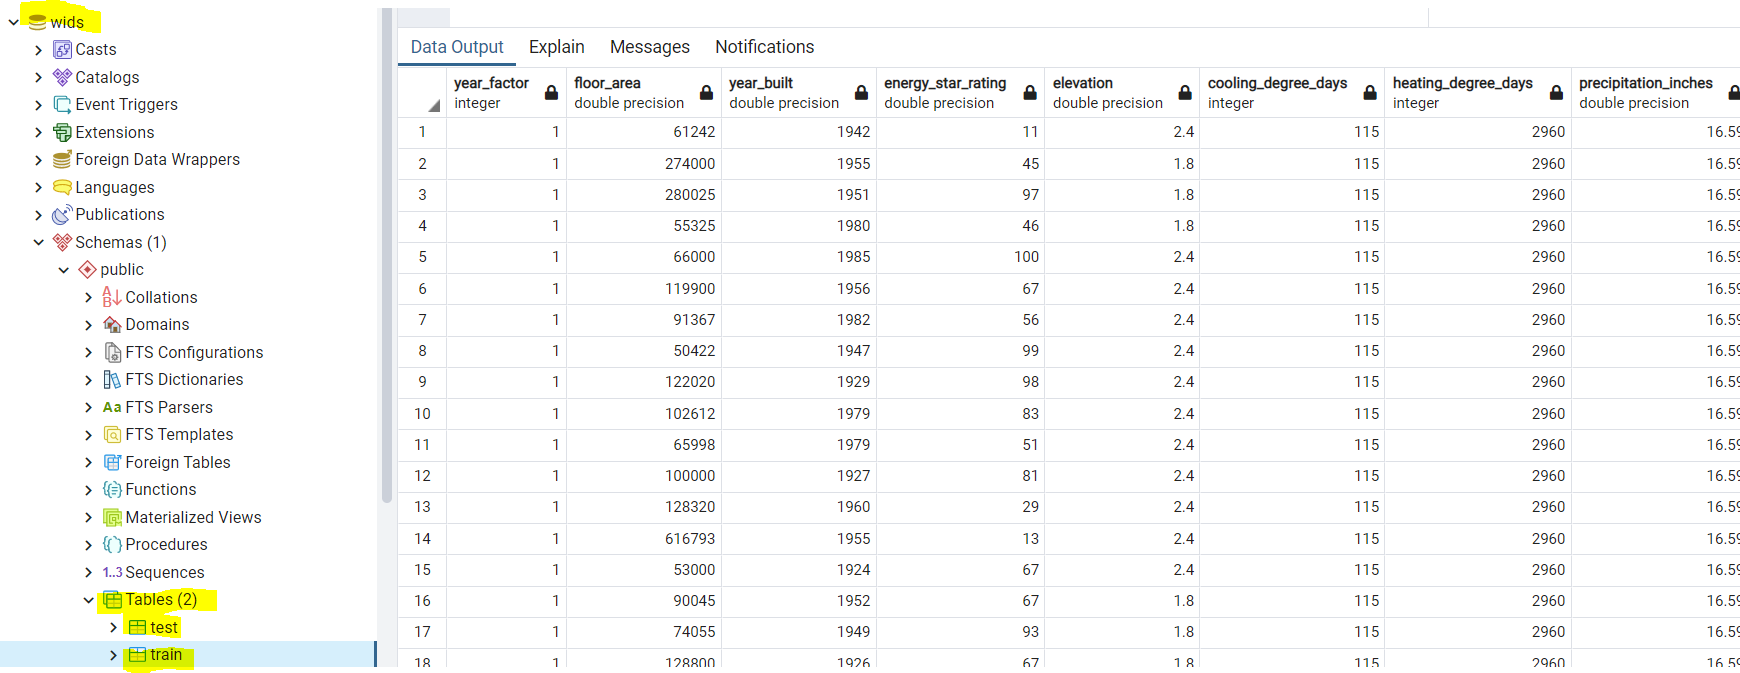